# Basic EDA

Now, we will do some basic EDA for some variables. <br>
Since the **test_df** does not provide the `target`, we will only use **train_df** in our EDA. <br>
For the following EDA, we will denote **train_0** as the dataset which only contains **Non Job-Seekers** and **train_1** as the dataset which only contains **Job Seekers**.

In [1]:
#Import Essential Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import researchpy
sns.set_style("dark")

In [2]:
#Import the clean dataset
train_df = pd.read_csv("train_clean.csv")

### Gender

(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

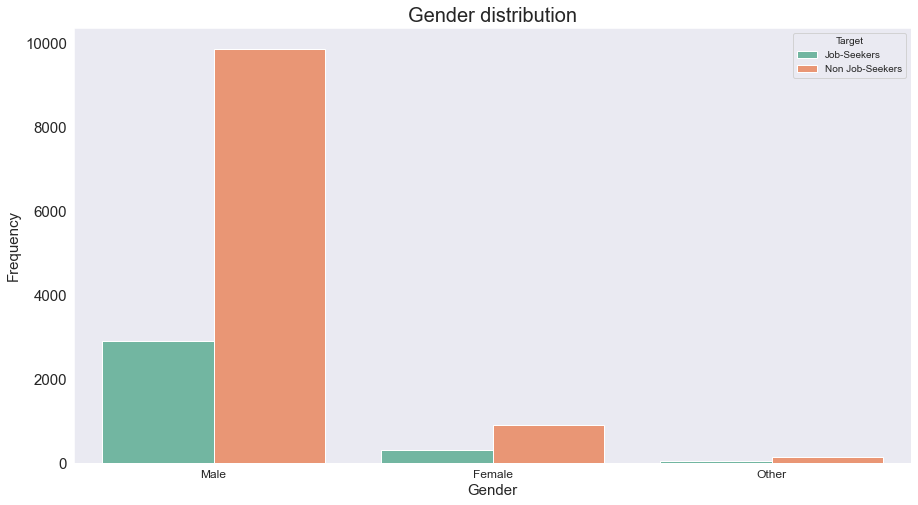

In [3]:
#Set the order of gender
gender_order = ['Male', 'Female', 'Other']

#Plot countplot of gender distribution
f, ax = plt.subplots(figsize = (15,8))
sns.countplot(data=train_df, x='gender', order=gender_order, hue='target', palette="Set2")
ax.set_title("Gender distribution", fontsize = 20)
ax.set_xlabel("Gender", fontsize = 15)
ax.set_ylabel("Frequency", fontsize = 15)
ax.legend(title="Target")
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 15)

From the graph, we notice that **Male** dominates the dataset. This tells us that data science is more popular among **Male**. Next, we will check the percentage of **Job-Seekers** in each category.

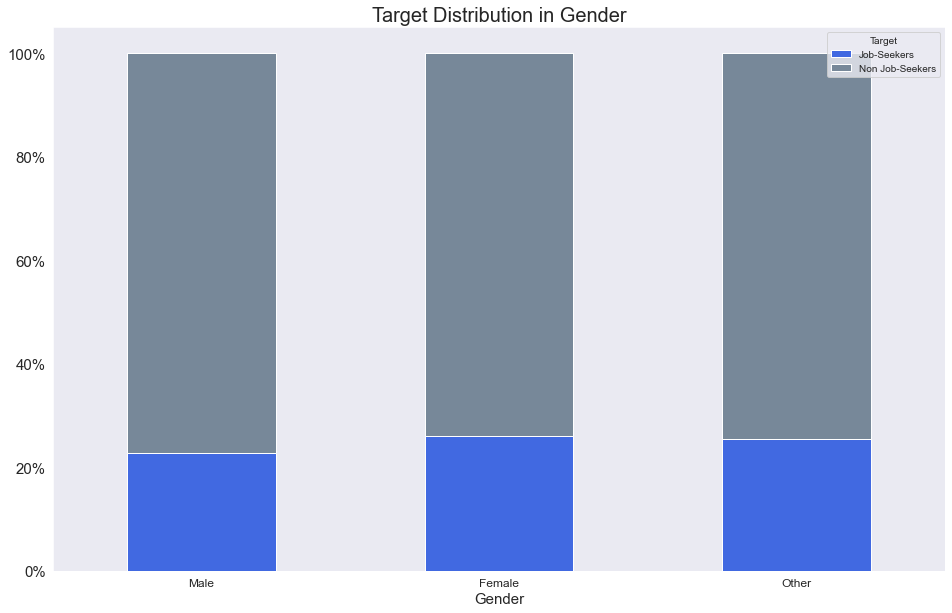

In [4]:
#Plot percentage stacked bar of Gender
f, ax = plt.subplots(1, figsize = (16,10))

pd.crosstab(index = train_df.gender, 
            columns= train_df.target, 
            normalize='index').loc[gender_order].plot(kind = 'bar', stacked = True, color=['royalblue', 'lightslategrey'], ax = ax)

ax.set_title("Target Distribution in Gender", fontsize = 20)
ax.set_xlabel("Gender", fontsize = 15)
ax.legend(title="Target")
plt.xticks(rotation = 0, fontsize = 12)
plt.yticks(fontsize = 15)

#Adjust the y-axis to percentage
import matplotlib.ticker as mtick
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

From the graph, it seems that each category of `gender` shares about the same ratio of **Job-Seekers** and **Non Job-Seekers** which is approximately between 22~25%. Hence, we can deduce that `gender` is not a key factor of Job-changing. 

### City Development Index

Next, we try to gain some data insights from `city_development_index` by using a kdeplot. CDI is a measure of the level of development in cities. Below is the formula for calculating CDI. _(Retrieved from https://en.wikipedia.org/wiki/City_development_index)_ 

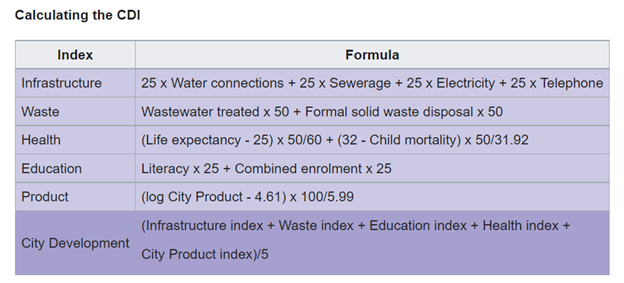

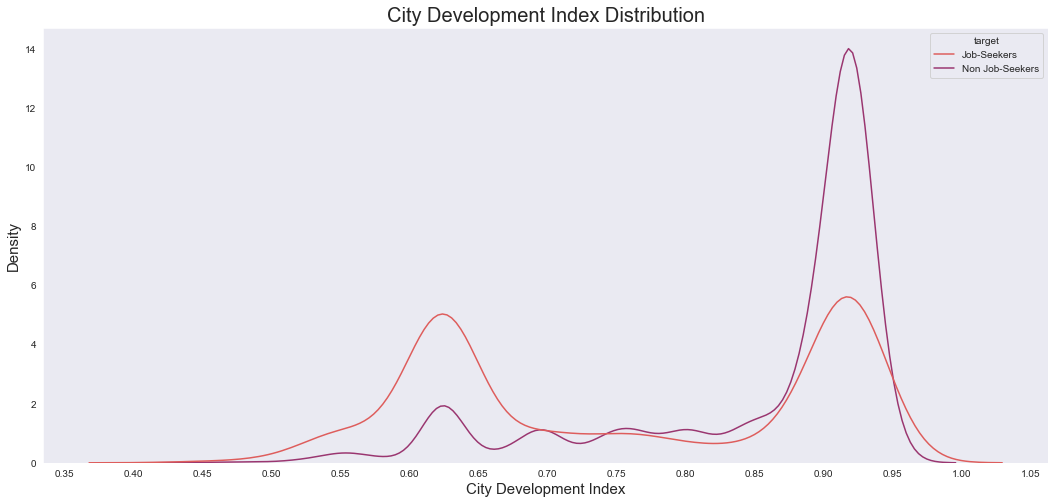

In [5]:
#Plot kdeplot for city_development_index
f, ax = plt.subplots(figsize = (18,8))
sns.kdeplot(data = train_df, x="city_development_index", hue="target", common_norm=False, palette="flare")
ax.set_title("City Development Index Distribution", fontsize = 20)
ax.set_xlabel("City Development Index", fontsize = 15)
ax.set_ylabel("Density", fontsize = 15)

#Adjust the scale of x-axis
from matplotlib.pyplot import MultipleLocator
x_major_locator = MultipleLocator(0.05)
ax.xaxis.set_major_locator(x_major_locator)

Interestingly, we can see that there are two spikes in the graph, one is around 0.60 ~ 0.65 and the other is around 0.87 ~ 0.95. This means that most of the people live within these two ranges. <br> A significant observation is that people who live in the higher `CDI` city are less likely to find new jobs whereas people who live in the lower `CDI` city tend to seek new jobs. The reason maybe higher `CDI` cities can provide more stable and lucrative jobs so the people will have less interest in job-seeking. On the other hand, lower `CDI` cities are not as advanced and developed as the higher `CDI` cities so they are unlikely to provide satisfying jobs for the people. 

### Educational Level and Enrolled University

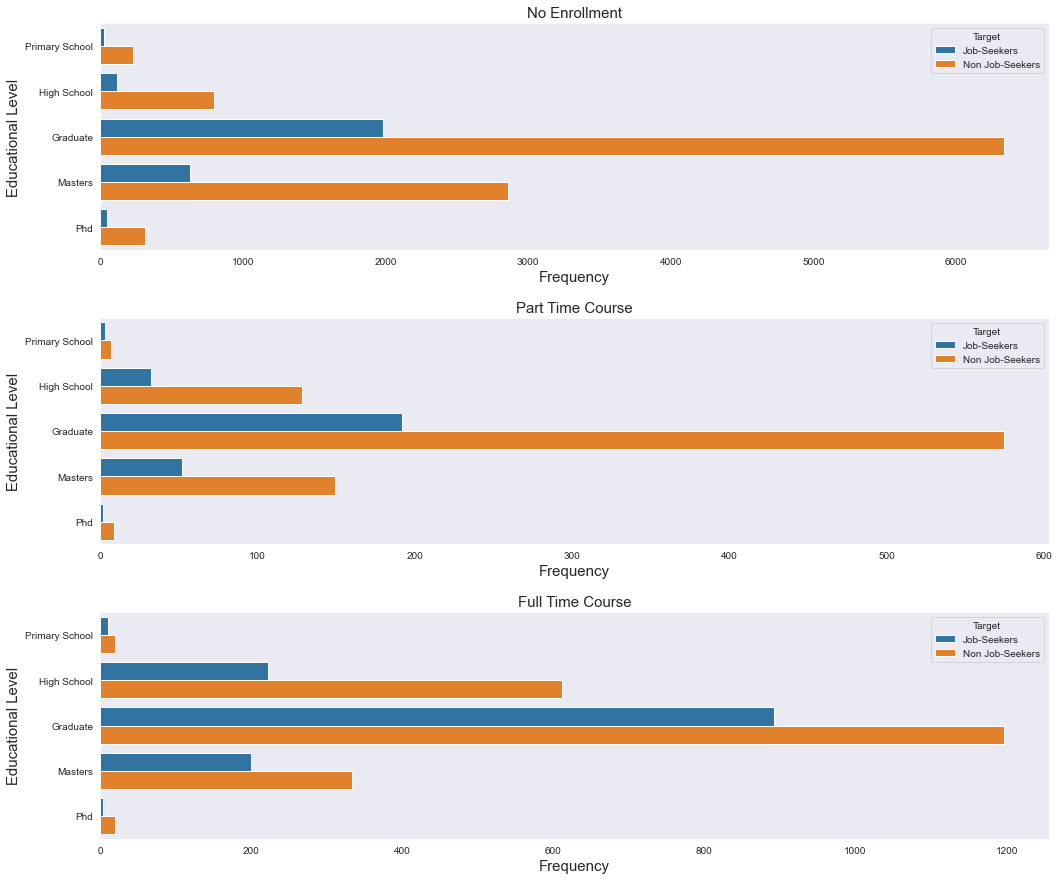

In [6]:
#Set the order of educational_level
ed_order = ['Primary School','High School','Graduate','Masters','Phd']

#Separating dataset by enrolled_university
no_enrol = train_df.loc[train_df.enrolled_university == 'no_enrollment']
part_enrol = train_df.loc[train_df.enrolled_university == 'Part time course']
full_enrol = train_df.loc[train_df.enrolled_university == 'Full time course']

#Plot countplots of educational_level by enrolled_university
f, ax = plt.subplots(nrows = 3, ncols = 1, figsize = (17, 15))

sns.countplot(data=no_enrol, y='education_level', order=ed_order, hue='target', ax=ax[0])
ax[0].set_title("No Enrollment", fontsize=15)
ax[0].set_xlabel("Frequency", fontsize = 15)
ax[0].set_ylabel("Educational Level", fontsize = 15)
ax[0].legend(title="Target")

sns.countplot(data=part_enrol, y='education_level', order=ed_order, hue='target', ax=ax[1])
ax[1].set_title("Part Time Course", fontsize=15)
ax[1].set_xlabel("Frequency", fontsize = 15)
ax[1].set_ylabel("Educational Level", fontsize = 15)
ax[1].legend(title="Target")

sns.countplot(data=full_enrol, y='education_level', order=ed_order, hue='target', hue_order = ['Job-Seekers', 'Non Job-Seekers'], ax=ax[2])
ax[2].set_title("Full Time Course", fontsize=15)
ax[2].set_xlabel("Frequency", fontsize = 15)
ax[2].set_ylabel("Educational Level", fontsize = 15)
ax[2].legend(title="Target")

#Adjust the spacing for each graphs
f.subplots_adjust(hspace=0.3)

[Text(0.5, 0, 'No Enrollment'),
 Text(1.5, 0, 'Part Time Course'),
 Text(2.5, 0, 'Full Time Course')]

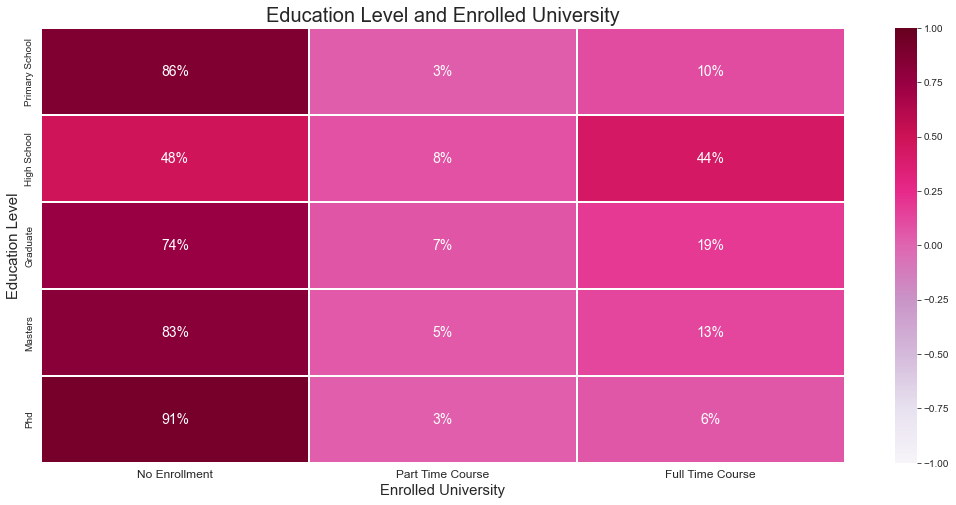

In [7]:
#Plot Heatmap of Educational Level and Enrolled University
f, ax = plt.subplots(figsize = (18,8))
ed_order = ['Primary School','High School','Graduate','Masters','Phd']
enroll_order = ['no_enrollment','Part time course','Full time course']
temp = pd.crosstab(train_df['education_level'], train_df['enrolled_university'], normalize='index').loc[ed_order, enroll_order]
ax = sns.heatmap(data=temp, linewidths=.1, vmin=-1, vmax=1, linewidth=2, annot=True, cmap="PuRd", fmt='1.0%',annot_kws={"fontsize":14})
ax.set_title('Education Level and Enrolled University', fontsize=20)
ax.set_xlabel("Enrolled University", fontsize=15)
ax.set_ylabel("Education Level", fontsize=15)
ax.set_xticklabels(['No Enrollment', 'Part Time Course', 'Full Time Course'], fontsize = 12)

Text(689.8545454545454, 0.5, 'Education Level')

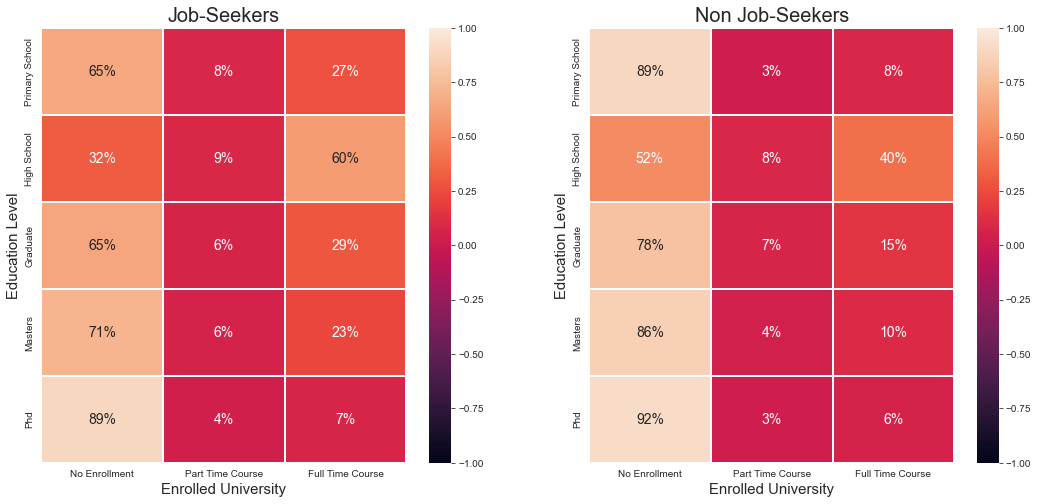

In [8]:
#Separating dataset by target
train_0 = train_df.loc[train_df.target == 'Non Job-Seekers']
train_1 = train_df.loc[train_df.target == 'Job-Seekers']

#Set the order for educational_level and enrolled_university
ed_order = ['Primary School','High School','Graduate','Masters','Phd']
enroll_order = ['no_enrollment','Part time course','Full time course']

#Plot heatmap for educational_level and enrolled_university
f, ax = plt.subplots(nrows = 1,ncols = 2, figsize = (18,8))

temp1 = pd.crosstab(train_1['education_level'], train_1['enrolled_university'], normalize='index').loc[ed_order, enroll_order]
temp2 = pd.crosstab(train_0['education_level'], train_0['enrolled_university'], normalize='index').loc[ed_order, enroll_order]

sns.heatmap(data=temp1, linewidths=.1, vmin=-1, vmax=1, linewidth=2, annot=True, fmt='1.0%',annot_kws={"fontsize":14}, ax = ax[0])
sns.heatmap(data=temp2, linewidths=.1, vmin=-1, vmax=1, linewidth=2, annot=True, fmt='1.0%',annot_kws={"fontsize":14}, ax = ax[1])

ax[0].set_title('Job-Seekers', fontsize=20)
ax[0].set_xlabel("Enrolled University", fontsize=15)
ax[0].set_xticklabels(['No Enrollment', 'Part Time Course', 'Full Time Course'])
ax[0].set_ylabel("Education Level", fontsize=15)

ax[1].set_title("Non Job-Seekers", fontsize=20)
ax[1].set_xlabel("Enrolled University", fontsize=15)
ax[1].set_xticklabels(['No Enrollment', 'Part Time Course', 'Full Time Course'])
ax[1].set_ylabel("Education Level", fontsize=15)


Among all the `enrolled_university`, the majority of the people have **Graduate** degrees or above and most of them do not have any enrollment currently. We notice that the ratios of **Job-Seekers** are relatively high in **Full Time Course** compared to the other two categories. The reason maybe people who are currently having **Full Time Course** do not have any job yet because they are still focusing on their studies. Therefore, they participate in the training to improve their skills so that they can have a better chance at securing a desired job. On the other hand, people who have `No Enrollment` or `Part Time Course` are most likely have jobs now, thus their job-seeking interests are not as strong as those who have `Full Time Course`.

### Working Experience

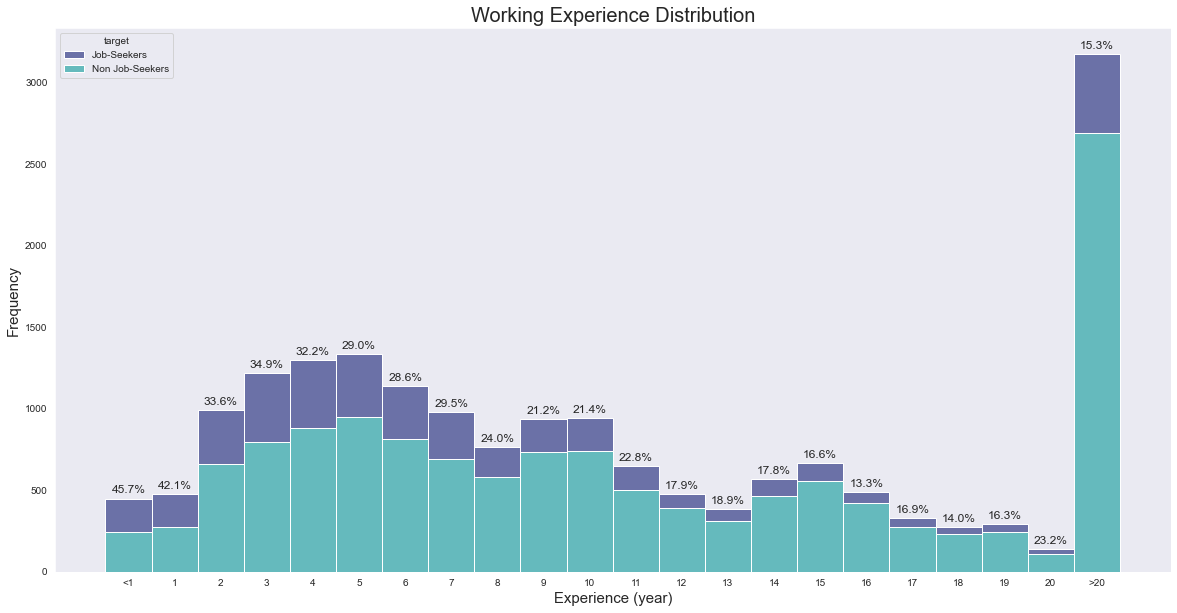

In [9]:
#Sort the dataset with experience
exp_order = ['<1', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '>20']
train_df['experience'] = pd.Categorical(train_df['experience'], exp_order)

#Split the dataset by target
train_0 = train_df[train_df['target']=='Non Job-Seekers']
train_1 = train_df[train_df['target']=='Job-Seekers']

#Plot histplot of experience
f, ax = plt.subplots(figsize = (20,10))
ax = sns.histplot(x = 'experience', data = train_df, hue = 'target', multiple="stack", palette='mako')
ax.set_title("Working Experience Distribution", fontsize = 20)
ax.set_xlabel("Experience (year)", fontsize = 15)
ax.set_ylabel("Frequency", fontsize = 15)

#Count the percentage
list = []
for x in range(22):
    job_seekers = train_1['experience'].value_counts(sort=False)[x]
    non_job_seekers = train_0['experience'].value_counts(sort=False)[x]
    total = job_seekers + non_job_seekers
    percentage = ((job_seekers/total * 100))
    list.append(f'{percentage:.1f}%')

#Annotate the percentage on each bar
i=0
for p in ax.containers[0].patches:
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + ax.containers[1].patches[i].get_height()
    ax.annotate(list[i], (x, y+50), ha='center', va='center', fontsize = 12)
    i+=1


From the observation of the graph, the majority of people have more than 20 years of working experience and the rests are mostly distributed between 2 ~ 7. <br>
We notice that among the people who have less years of working experience, the percentages of Job-Seekers are relatively higher than the people who have more years of working experience. For example, more than 40% of people who only have 1 year or less than 1 year of working experience are planning to find new jobs whereas only 15.3% of those who only more than 20 years of experience are doing job-seeking. <br>
This is understandable because people who have less work experience are less likely to be in a stable state because they have stronger aspirations to achieve better career goals. That's why they want to participate in the training programs to gain experience and build their skills so that they can reach a higher level on their career paths. <br>
However, people who have been working for a long time will have less interest in job-seeking because they have already statisfied with their current circumstances and they lack of the motivations to pursue new career. Therefore, they main purpose of training is to upgrade their skills and increase their work performances in their current jobs.

Text(0.5, 1.0, 'Non Job-Seekers')

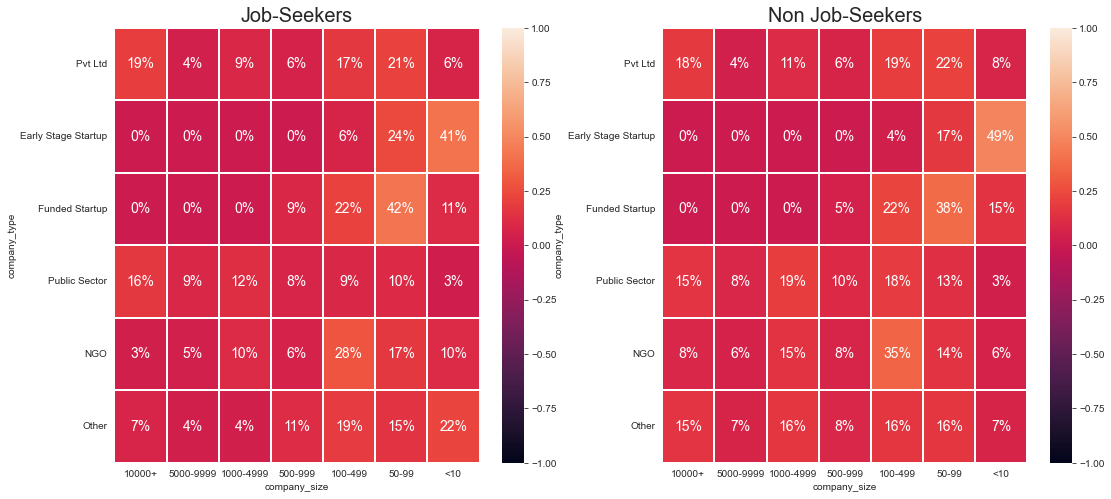

In [10]:
#Plot heatmap for company_type and company_size
f, ax = plt.subplots(nrows = 1,ncols = 2, figsize = (18,8))

company_type_order = ['Pvt Ltd', 'Early Stage Startup', 'Funded Startup', 'Public Sector', 'NGO', 'Other']
company_size_order = ['10000+', '5000-9999', '1000-4999', '500-999', '100-499', '50-99', '<10']
temp3 = pd.crosstab(train_1['company_type'], train_1['company_size'], normalize='index').loc[company_type_order, company_size_order]
temp4 = pd.crosstab(train_0['company_type'], train_0['company_size'], normalize='index').loc[company_type_order, company_size_order]

sns.heatmap(data=temp3, linewidths=.1, vmin=-1, vmax=1, linewidth=2, annot=True, fmt='1.0%',annot_kws={"fontsize":14}, ax = ax[0])
sns.heatmap(data=temp4, linewidths=.1, vmin=-1, vmax=1, linewidth=2, annot=True, fmt='1.0%',annot_kws={"fontsize":14}, ax = ax[1])
ax[0].set_title('Job-Seekers', fontsize=20)
ax[1].set_title("Non Job-Seekers", fontsize=20)

In [11]:
temp4 = pd.crosstab(train_1['company_type'], train_1['company_size'])

In [12]:
temp4

company_size,10/49,100-499,1000-4999,10000+,50-99,500-999,5000-9999,<10,Missing,No company
company_type,,,,,,,,,,
Early Stage Startup,35,8,0,0,30,0,0,51,0,0
Funded Startup,22,30,0,0,58,12,0,15,1,0
Missing,21,16,5,9,34,9,9,12,1594,0
NGO,10,25,9,3,15,5,4,9,8,0
No company,0,0,0,0,0,0,0,0,0,462
Other,3,5,1,2,4,3,1,6,2,0
Public Sector,17,17,23,32,19,15,17,5,50,0
Pvt Ltd,202,287,148,320,356,100,66,107,84,0


In [13]:
temp5 = pd.crosstab(train_0['company_type'], train_0['company_size'])

In [14]:
temp5

company_size,10/49,100-499,1000-4999,10000+,50-99,500-999,5000-9999,<10,Missing,No company
company_type,,,,,,,,,,
Early Stage Startup,132,17,0,0,73,2,0,214,0,0
Funded Startup,166,184,0,0,318,42,0,124,3,0
Missing,68,114,48,60,170,47,21,45,1877,0
NGO,18,143,61,34,59,31,25,25,16,0
No company,0,0,0,0,0,0,0,0,0,848
Other,8,14,14,13,14,7,6,6,5,0
Public Sector,25,131,137,108,92,70,59,25,68,0
Pvt Ltd,665,1491,832,1380,1704,504,334,599,282,0


To indicate the strength of the association between two nominal variables, Cramér's V (Cramér, 1946) is often used.

As for the interpretation for Cramér's V various rules of thumb exist but one of them is from Cohen (1988, pp. 222, 224, 225) who lets the interpretation depend on the degrees of freedom, shown in the table below.

|df*|negligible|small|medium|large|
|-------|---|---|---|---|
|1|0 < .10|.10 < .30|.30 < .50|.50 or more|
|2|0 < .07|.07 < .21|.21 < .35|.35 or more|
|3|0 < .06|.06 < .17|.17 < .29|.29 or more|
|4|0 < .05|.05 < .15|.15 < .25|.25 or more|
|5|0 < .05|.05 < .13|.13 < .22|.22 or more|

The degrees of freedom (df*) is for Cramér's V the minimum of the number of rows, or number of columns, then minus one.



In [15]:
# to find the strength of association between company type and company size for job-seekers

In [16]:
crosstab, res = researchpy.crosstab(train_1['company_type'], train_1['company_size'], test='chi-square')

In [17]:
res

,Chi-square test,results
0,Pearson Chi-square ( 63.0) =,8483.0498
1,p-value =,0.0000
2,Cramer's V =,0.5240


In [18]:
degreefreedom = min(temp4.shape[0], temp4.shape[1]) - 1
print("The degree of freedom is",degreefreedom)
V = res.iloc[2,1]
print("Cramer's V is",V)
if degreefreedom == 1:
    if V < 0.10:
        qual = 'negligible'
    elif V < 0.30:
        qual = 'small'
    elif V < 0.50:
        qual = 'medium'
    else:
        qual = 'large'
elif degreefreedom == 2:
    if V < 0.07:
        qual = 'negligible'
    elif V < 0.21:
        qual = 'small'
    elif V < 0.35:
        qual = 'medium'
    else:
        qual = 'large'
elif degreefreedom == 3:
    if V < 0.06:
        qual = 'negligible'
    elif V < 0.17:
        qual = 'small'
    elif V < 0.29:
        qual = 'medium'
    else:
        qual = 'large'
elif degreefreedom == 4:
    if V < 0.05:
        qual = 'negligible'
    elif V < 0.15:
        qual = 'small'
    elif V < 0.25:
        qual = 'medium'
    else:
        qual = 'large'
else:
    if V < 0.05:
        qual = 'negligible'
    elif V < 0.13:
        qual = 'small'
    elif V < 0.22:
        qual = 'medium'
    else:
        qual = 'large'

print("The strength of association between company type and company size for job seekers is "+qual)

The degree of freedom is 7
Cramer's V is 0.524
The strength of association between company type and company size for job seekers is large


In [19]:
# to find the strength of association between company type and company size for non job-seekers

In [20]:
crosstab, res = researchpy.crosstab(train_0['company_type'], train_0['company_size'], test='chi-square')
res

,Chi-square test,results
0,Pearson Chi-square ( 63.0) =,23759.1056
1,p-value =,0.0000
2,Cramer's V =,0.5000


In [21]:
degreefreedom = min(temp5.shape[0], temp5.shape[1]) - 1
print("The degree of freedom is",degreefreedom)
V = res.iloc[2,1]
print("Cramer's V is",V)
if degreefreedom == 1:
    if V < 0.10:
        qual = 'negligible'
    elif V < 0.30:
        qual = 'small'
    elif V < 0.50:
        qual = 'medium'
    else:
        qual = 'large'
elif degreefreedom == 2:
    if V < 0.07:
        qual = 'negligible'
    elif V < 0.21:
        qual = 'small'
    elif V < 0.35:
        qual = 'medium'
    else:
        qual = 'large'
elif degreefreedom == 3:
    if V < 0.06:
        qual = 'negligible'
    elif V < 0.17:
        qual = 'small'
    elif V < 0.29:
        qual = 'medium'
    else:
        qual = 'large'
elif degreefreedom == 4:
    if V < 0.05:
        qual = 'negligible'
    elif V < 0.15:
        qual = 'small'
    elif V < 0.25:
        qual = 'medium'
    else:
        qual = 'large'
else:
    if V < 0.05:
        qual = 'negligible'
    elif V < 0.13:
        qual = 'small'
    elif V < 0.22:
        qual = 'medium'
    else:
        qual = 'large'

print("The strength of association between company type and company size for non-job seekers is "+qual)

The degree of freedom is 7
Cramer's V is 0.5
The strength of association between company type and company size for non-job seekers is large


In [22]:
train_df['last_new_job'].unique()

array(['1', '>4', 'never', '4', '3', '2'], dtype=object)

[Text(0.5, 1.0, 'last new job distribution')]

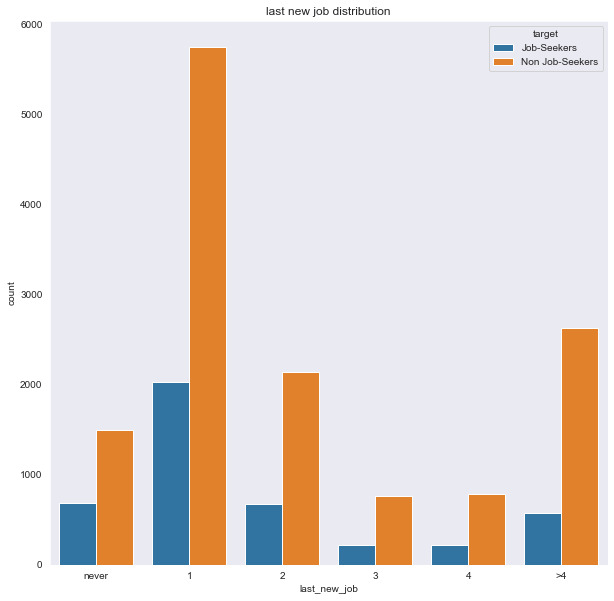

In [23]:
#Plot countplot for last_new_job distribution
plt.figure(figsize=(10, 10))
last_new_job_order = ['never', '1', '2', '3','4','>4']
sns.countplot(x = "last_new_job", data = train_df, hue = "target", order = last_new_job_order).set(title='last new job distribution')

<Figure size 1296x720 with 0 Axes>

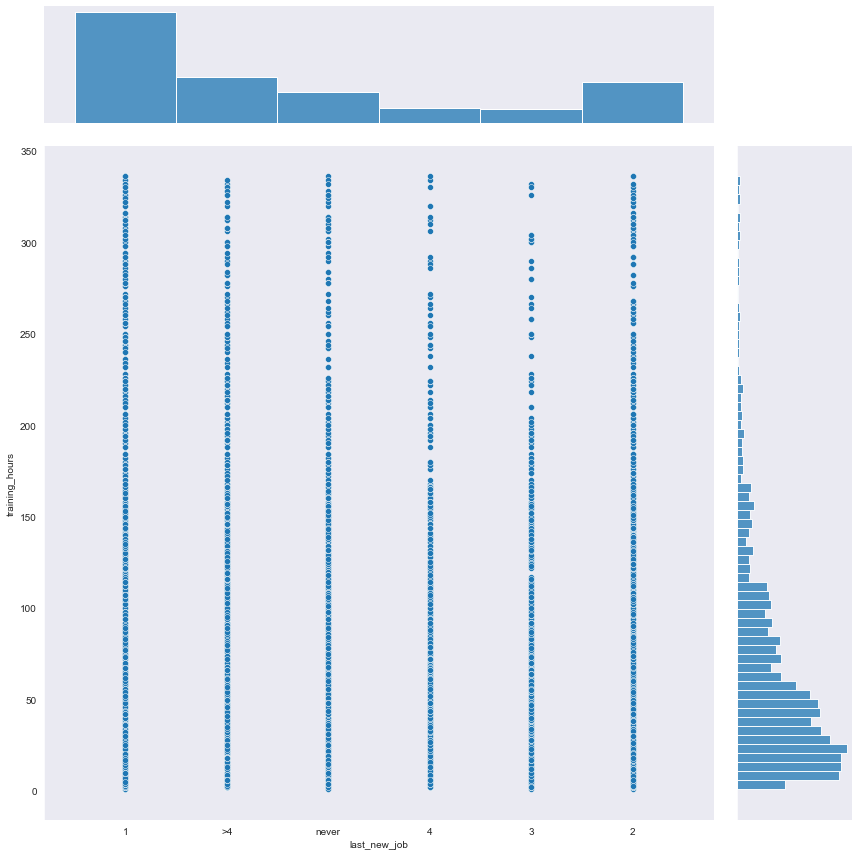

In [24]:
#plot jointplot of last_new_job and training_hours
plt.figure(figsize = (18, 10))
sns.jointplot(data = train_df, x = "last_new_job", y = "training_hours", height = 12)

In [25]:
set=train_1['experience'].unique()

In [26]:
for i in set:
    print(i)
exp_order=['<1','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','>20']

>20
11
13
7
2
4
14
18
6
9
5
19
15
10
<1
3
8
12
20
1
17
16


Text(0.5, 1.0, 'Non Job-Seekers')

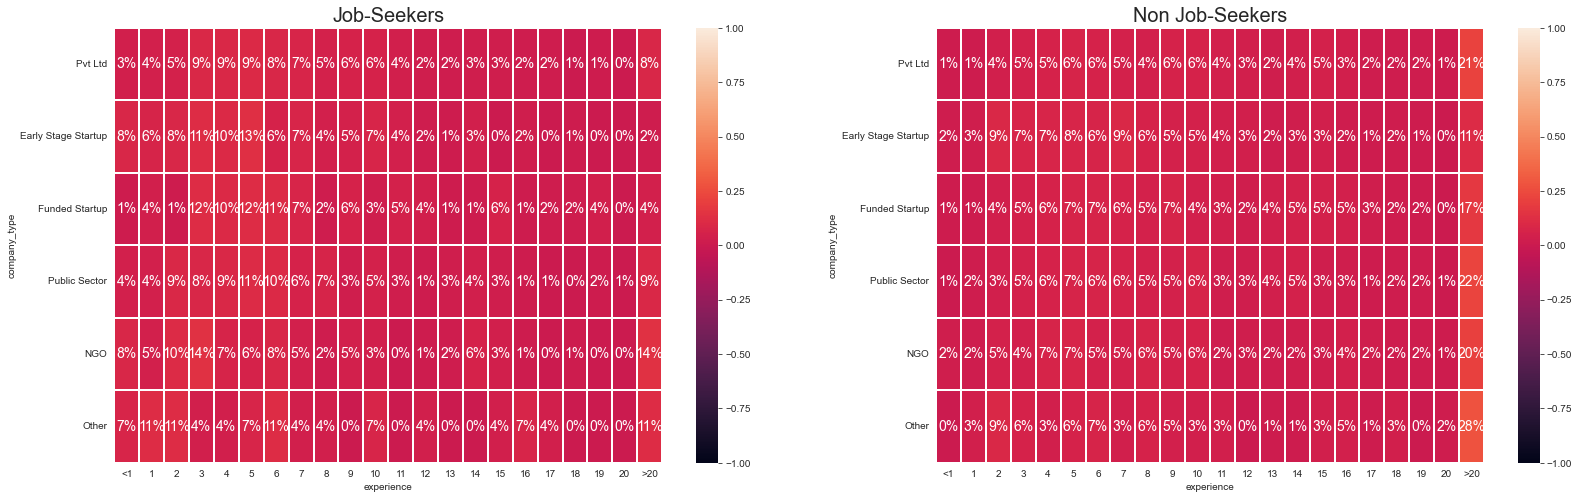

In [27]:
#Plot heatmap for company_type and experience
f, ax = plt.subplots(nrows = 1,ncols = 2, figsize = (27,8))

company_type_order = ['Pvt Ltd', 'Early Stage Startup', 'Funded Startup', 'Public Sector', 'NGO', 'Other']
exp_order=['<1','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','>20']
temp6 = pd.crosstab(train_1['company_type'], train_1['experience'], normalize='index').loc[company_type_order, exp_order]
temp7 = pd.crosstab(train_0['company_type'], train_0['experience'], normalize='index').loc[company_type_order, exp_order]

sns.heatmap(data=temp6, linewidths=.1, vmin=-1, vmax=1, linewidth=2, annot=True, fmt='1.0%',annot_kws={"fontsize":14}, ax = ax[0])
sns.heatmap(data=temp7, linewidths=.1, vmin=-1, vmax=1, linewidth=2, annot=True, fmt='1.0%',annot_kws={"fontsize":14}, ax = ax[1])
ax[0].set_title('Job-Seekers', fontsize=20)
ax[1].set_title("Non Job-Seekers", fontsize=20)

In [28]:
# to find the strength of association between company type and experience

In [29]:
temp6=pd.crosstab(train_1['company_type'], train_1['experience'])
temp6

experience,<1,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,>20
company_type,,,,,,,,,,,,,,,,,,,,,
Early Stage Startup,10,8,10,14,12,16,7,9,5,6,...,2,1,4,0,3,0,1,0,0,2
Funded Startup,2,5,2,16,14,16,15,10,3,8,...,5,2,2,8,2,3,3,5,0,6
Missing,69,64,127,143,165,128,111,103,65,56,...,32,25,36,46,20,23,17,22,23,303
NGO,7,4,9,12,6,5,7,4,2,4,...,1,2,5,3,1,0,1,0,0,12
No company,50,41,76,69,56,42,30,32,9,20,...,2,2,1,2,4,1,3,0,2,4
Other,2,3,3,1,1,2,3,1,1,0,...,1,0,0,1,2,1,0,0,0,3
Public Sector,8,8,17,16,17,21,19,11,13,6,...,2,5,7,6,2,1,0,3,1,17
Pvt Ltd,57,67,90,156,146,157,134,120,86,98,...,40,36,46,45,31,27,13,18,7,138


In [30]:
temp7=pd.crosstab(train_0['company_type'], train_0['experience'])
temp6

experience,<1,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,>20
company_type,,,,,,,,,,,,,,,,,,,,,
Early Stage Startup,10,8,10,14,12,16,7,9,5,6,...,2,1,4,0,3,0,1,0,0,2
Funded Startup,2,5,2,16,14,16,15,10,3,8,...,5,2,2,8,2,3,3,5,0,6
Missing,69,64,127,143,165,128,111,103,65,56,...,32,25,36,46,20,23,17,22,23,303
NGO,7,4,9,12,6,5,7,4,2,4,...,1,2,5,3,1,0,1,0,0,12
No company,50,41,76,69,56,42,30,32,9,20,...,2,2,1,2,4,1,3,0,2,4
Other,2,3,3,1,1,2,3,1,1,0,...,1,0,0,1,2,1,0,0,0,3
Public Sector,8,8,17,16,17,21,19,11,13,6,...,2,5,7,6,2,1,0,3,1,17
Pvt Ltd,57,67,90,156,146,157,134,120,86,98,...,40,36,46,45,31,27,13,18,7,138


In [31]:
# to find the strength of association between company type and experience for job seekers

In [32]:
crosstab, res = researchpy.crosstab(train_1['company_type'], train_1['experience'], test='chi-square')
res

,Chi-square test,results
0,Pearson Chi-square ( 147.0) =,510.0116
1,p-value =,0.0000
2,Cramer's V =,0.1285


In [33]:
degreefreedom = min(temp6.shape[0], temp6.shape[1]) - 1
print("The degree of freedom is",degreefreedom)
V = res.iloc[2,1]
print("Cramer's V is",V)
if degreefreedom == 1:
    if V < 0.10:
        qual = 'negligible'
    elif V < 0.30:
        qual = 'small'
    elif V < 0.50:
        qual = 'medium'
    else:
        qual = 'large'
elif degreefreedom == 2:
    if V < 0.07:
        qual = 'negligible'
    elif V < 0.21:
        qual = 'small'
    elif V < 0.35:
        qual = 'medium'
    else:
        qual = 'large'
elif degreefreedom == 3:
    if V < 0.06:
        qual = 'negligible'
    elif V < 0.17:
        qual = 'small'
    elif V < 0.29:
        qual = 'medium'
    else:
        qual = 'large'
elif degreefreedom == 4:
    if V < 0.05:
        qual = 'negligible'
    elif V < 0.15:
        qual = 'small'
    elif V < 0.25:
        qual = 'medium'
    else:
        qual = 'large'
else:
    if V < 0.05:
        qual = 'negligible'
    elif V < 0.13:
        qual = 'small'
    elif V < 0.22:
        qual = 'medium'
    else:
        qual = 'large'

print("The strength of association between company type and experience for job seekers is "+qual)

The degree of freedom is 7
Cramer's V is 0.1285
The strength of association between company type and experience for job seekers is small


In [34]:
crosstab, res = researchpy.crosstab(train_0['company_type'], train_0['experience'], test='chi-square')
res

,Chi-square test,results
0,Pearson Chi-square ( 147.0) =,1407.1288
1,p-value =,0.0000
2,Cramer's V =,0.1217


In [35]:
degreefreedom = min(temp7.shape[0], temp7.shape[1]) - 1
print("The degree of freedom is",degreefreedom)
V = res.iloc[2,1]
print("Cramer's V is",V)
if degreefreedom == 1:
    if V < 0.10:
        qual = 'negligible'
    elif V < 0.30:
        qual = 'small'
    elif V < 0.50:
        qual = 'medium'
    else:
        qual = 'large'
elif degreefreedom == 2:
    if V < 0.07:
        qual = 'negligible'
    elif V < 0.21:
        qual = 'small'
    elif V < 0.35:
        qual = 'medium'
    else:
        qual = 'large'
elif degreefreedom == 3:
    if V < 0.06:
        qual = 'negligible'
    elif V < 0.17:
        qual = 'small'
    elif V < 0.29:
        qual = 'medium'
    else:
        qual = 'large'
elif degreefreedom == 4:
    if V < 0.05:
        qual = 'negligible'
    elif V < 0.15:
        qual = 'small'
    elif V < 0.25:
        qual = 'medium'
    else:
        qual = 'large'
else:
    if V < 0.05:
        qual = 'negligible'
    elif V < 0.13:
        qual = 'small'
    elif V < 0.22:
        qual = 'medium'
    else:
        qual = 'large'

print("The strength of association between company type and experience for non-job seekers is "+qual)

The degree of freedom is 7
Cramer's V is 0.1217
The strength of association between company type and experience for non-job seekers is small
